In [1]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, AveragePooling2D


DATADIR = 'datta'
CATEGORIES = ['0', '1','2','3','4']
labelFile = 'labels.csv' # file with all names of classes




IMG_SIZE = 64
def create_training_data():
    training_data = []
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category) 
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=C 1=O
        for img in tqdm(os.listdir(path)):  # iterate over each image
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
              
    return training_data

data=pd.read_csv(labelFile)
print("data shape ",data.shape,type(data))


training_data = create_training_data()


import random

print(len(training_data))
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])


X = []
Y = []

for features,label in training_data:
    X.append(features)
    Y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
X = X/255.0
X.shape[1:]

y=np.array(Y)



  1%|          | 2/200 [00:00<00:12, 16.43it/s]

data shape  (5, 2) <class 'pandas.core.frame.DataFrame'>


100%|██████████| 272/272 [00:00<00:00, 357.68it/s]


1168
0
1
1
0
3
3
2
4
4
0


In [2]:

model = Sequential()


model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=X.shape[1:]))
model.add(AveragePooling2D())
model.add(Dropout(0.5))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=128, activation='relu'))

model.add(Dense(units=5, activation = 'softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])




history = model.fit(X, y, batch_size=32, epochs=50,validation_split=0.3)
model.save('modelsign2.h5')


Epoch 1/50
26/26 [==============================] - 5s 210ms/step - loss: 1.4775 - accuracy: 0.2742 - val_loss: 1.1169 - val_accuracy: 0.4929
Epoch 2/50
26/26 [==============================] - 5s 190ms/step - loss: 0.9418 - accuracy: 0.6132 - val_loss: 0.6311 - val_accuracy: 0.7607
Epoch 3/50
26/26 [==============================] - 5s 198ms/step - loss: 0.7303 - accuracy: 0.6891 - val_loss: 0.5574 - val_accuracy: 0.7778
Epoch 4/50
26/26 [==============================] - 5s 187ms/step - loss: 0.6124 - accuracy: 0.7368 - val_loss: 0.5005 - val_accuracy: 0.7578
Epoch 5/50
26/26 [==============================] - 5s 192ms/step - loss: 0.5775 - accuracy: 0.7417 - val_loss: 0.4619 - val_accuracy: 0.8291
Epoch 6/50
26/26 [==============================] - 5s 199ms/step - loss: 0.4886 - accuracy: 0.7980 - val_loss: 0.4231 - val_accuracy: 0.8234
Epoch 7/50
26/26 [==============================] - 5s 184ms/step - loss: 0.4420 - accuracy: 0.8103 - val_loss: 0.3757 - val_accuracy: 0.8604
Epoch 

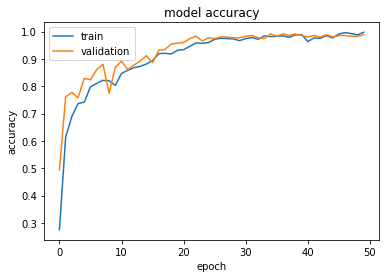

In [3]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

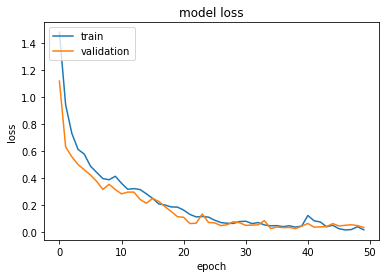

In [4]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()